# Task 1

In [1]:
import kagglehub

path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'intel-image-classification' dataset.
Path to dataset files: /kaggle/input/intel-image-classification


In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = os.path.join(path, "seg_train/seg_train")
test_dir = os.path.join(path, "seg_test/seg_test")

In [6]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


valid_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [7]:

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 11230 images belonging to 6 classes.


In [8]:

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Why is data augmentation a crucial regularization technique when fine-tuning a pre-trained model on a smaller dataset?

When working with a small dataset, it’s easy for a model to memorize the training images instead of actually learning what matters for making good predictions. That’s where data augmentation comes in. By randomly transforming images (like rotating, flipping, or zooming them), we create lots of new, slightly different versions of the originals. This helps the model see a wider variety of examples, even though we started with just a small amount of data.

As a result, the model gets better at spotting the important features in an image, instead of getting distracted by details that don’t matter. This not only helps prevent overfitting, but also makes the model more robust to the kinds of changes and variations it might encounter in real-world situations. In short, data augmentation is a simple but powerful way to get the most out of a small dataset and build a model you can trust.

# Task 2


In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(6, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,758 (90.98 MB)

 Trainable params: 263,046 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
print(len(model.layers))

180


## Why is it standard practice to freeze the early convolutional layers of a pre-trained network when applying transfer learning? What kind of features do these early layers typically learn?

When using transfer learning, it's standard to freeze the early convolutional layers of a pre-trained network because these layers have already learned to detect very basic, universal features like edges, textures, and simple patterns during training on large datasets. These low-level features are common across all images, regardless of the specific task or dataset.

By freezing these layers, we keep this general visual knowledge intact and only train the later layers to adapt to our specific problem like this problem. This approach prevents overfitting on our smaller dataset, speeds up training, and lets us benefit from the model’s prior learning. In summary, early convolutional layers typically learn to detect edges, corners, and textures, which form the foundation for understanding more complex shapes and objects in deeper layers.

# Task 3

In [11]:

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 152s 394ms/step - accuracy: 0.1790 - loss: 1.8758 - val_accuracy: 0.2675 - val_loss: 1.7256
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 79s 225ms/step - accuracy: 0.2098 - loss: 1.7713 - val_accuracy: 0.3092 - val_loss: 1.6774
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 80s 227ms/step - accuracy: 0.2341 - loss: 1.7368 - val_accuracy: 0.3434 - val_loss: 1.6303
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 80s 229ms/step - accuracy: 0.2631 - loss: 1.6926 - val_accuracy: 0.3869 - val_loss: 1.5919
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 79s 224ms/step - accuracy: 0.2936 - loss: 1.6542 - val_accuracy: 0.3919 - val_loss: 1.5537
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.2976 - loss: 1.6349 - val_accuracy: 0.3987 - val_loss: 1.5124
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 79s 224ms/step - accuracy: 0.3121 - loss: 1.6115 - val_accuracy: 0.4034 - val_loss: 1.4826
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.3224 - loss: 

In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_generator.reset()
pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step


Classification Report:
              precision    recall  f1-score   support

   buildings       0.42      0.37      0.39       437
      forest       0.50      0.71      0.59       474
     glacier       0.42      0.31      0.36       553
    mountain       0.33      0.75      0.46       525
         sea       1.00      0.01      0.01       510
      street       0.57      0.42      0.49       501

    accuracy                           0.42      3000
   macro avg       0.54      0.43      0.38      3000
weighted avg       0.54      0.42      0.38      3000



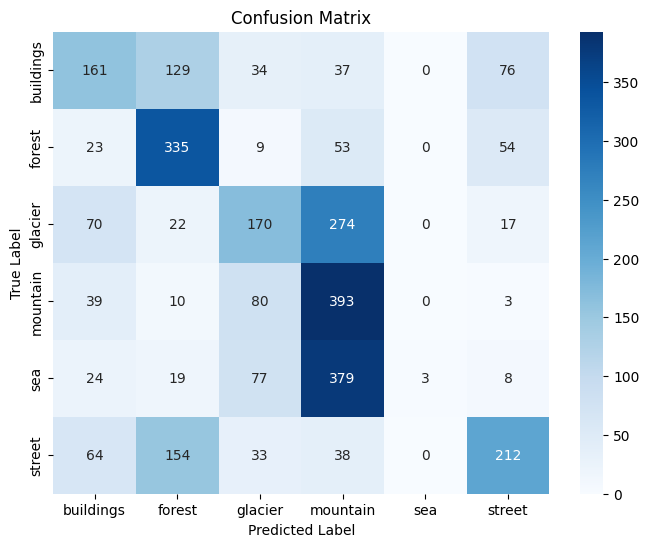

In [15]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Due to time constraint i only did 10 epochs so the accuracy is very low.I request you to kindly excuse that

# Task 4

Most-confused pair (off-diagonal): true='sea' → pred='mountain' (n=379); reverse (n=0)


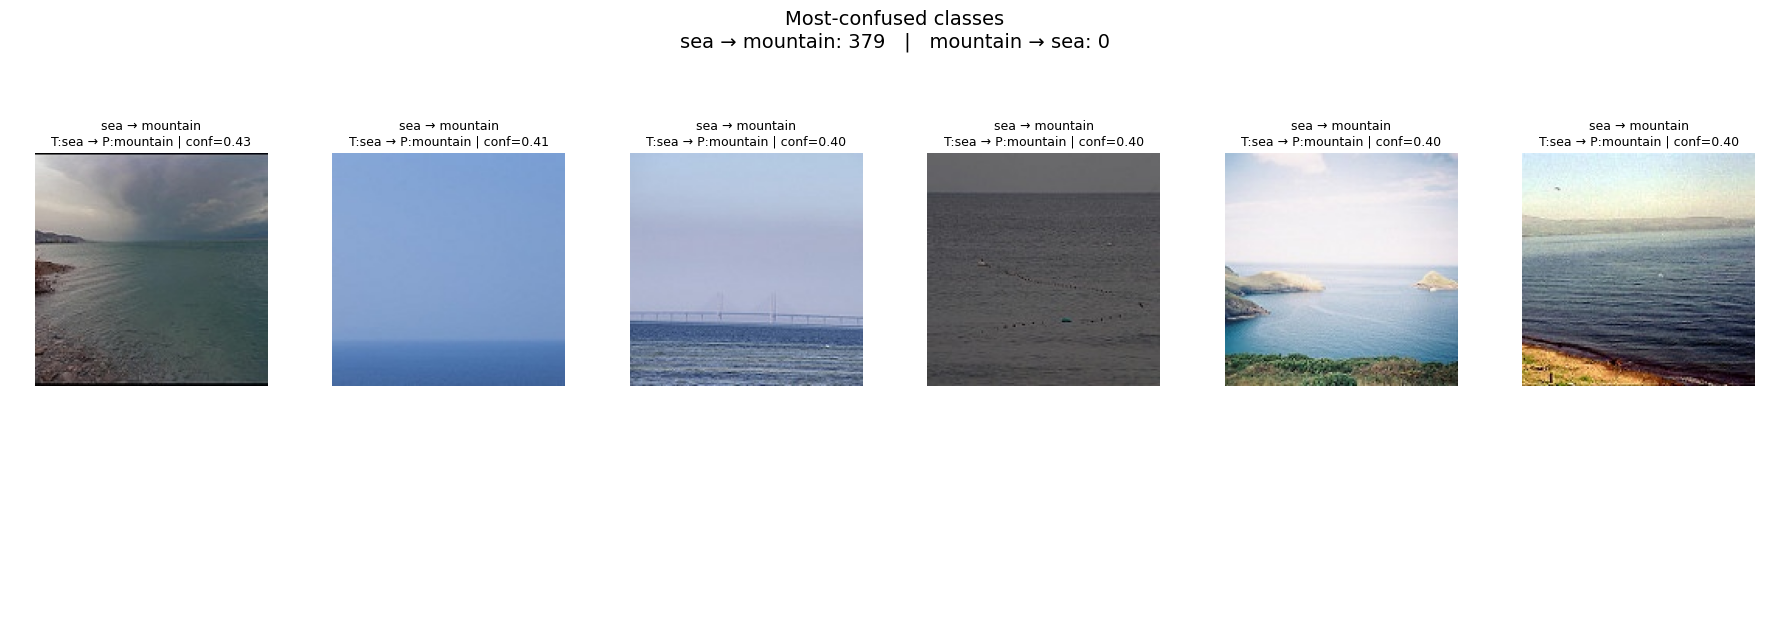

Summary: sea → mountain = 379,  mountain → sea = 0


In [17]:

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix

try:
    assert hasattr(test_generator, "shuffle") and (getattr(test_generator, "shuffle") is False)
except AssertionError:
    print("Warning: test_generator should have shuffle=False to align y_true, y_pred with file paths.")

cm = confusion_matrix(y_true, y_pred)
idx_to_class = {v: k for k, v in test_generator.class_indices.items()}
class_names = [idx_to_class[i] for i in range(len(idx_to_class))]

cm_off = cm.copy().astype(np.int64)
np.fill_diagonal(cm_off, -1)
true_idx, pred_idx = np.unravel_index(np.argmax(cm_off), cm_off.shape)
count_ab = cm[true_idx, pred_idx]
count_ba = cm[pred_idx, true_idx]
cls_a, cls_b = class_names[true_idx], class_names[pred_idx]

print(f"Most-confused pair (off-diagonal): true='{cls_a}' → pred='{cls_b}' (n={count_ab}); reverse (n={count_ba})")

if hasattr(test_generator, "filepaths"):
    filepaths = test_generator.filepaths
else:
    filepaths = [os.path.join(test_dir, rel) for rel in test_generator.filenames]

mis_ab = np.where((y_true == true_idx) & (y_pred == pred_idx))[0]
mis_ba = np.where((y_true == pred_idx) & (y_pred == true_idx))[0]

def sort_by_conf(indices, wrong_class):
    if 'pred_probs' in globals() and pred_probs is not None:
        conf = pred_probs[indices, wrong_class]
        order = np.argsort(-conf)
        return indices[order]
    return indices

mis_ab = sort_by_conf(mis_ab, pred_idx)
mis_ba = sort_by_conf(mis_ba, true_idx)

max_per_dir = 6
cols = min(6, max_per_dir)
n_ab = min(max_per_dir, len(mis_ab))
n_ba = min(max_per_dir, len(mis_ba))
rows = 2 if (n_ab > 0 or n_ba > 0) else 1

plt.figure(figsize=(3.0*cols, 3.2*rows))
plot_idx = 1

def plot_row(indices, n_to_show, title_prefix, true_i, pred_j):
    global plot_idx
    for i in range(n_to_show):
        k = indices[i]
        img_path = filepaths[k]
        try:
            img = Image.open(img_path).convert('RGB')
        except Exception:
            import matplotlib.image as mpimg
            img = mpimg.imread(img_path)

        plt.subplot(rows, cols, plot_idx)
        plt.imshow(img)

        t = f"{title_prefix}\nT:{class_names[true_i]} → P:{class_names[pred_j]}"
        if 'pred_probs' in globals() and pred_probs is not None:
            conf_val = float(pred_probs[k, pred_j])
            t += f" | conf={conf_val:.2f}"
        plt.title(t, fontsize=9)
        plt.axis('off')
        plot_idx += 1
    for _ in range(cols - n_to_show):
        plt.subplot(rows, cols, plot_idx); plt.axis('off'); plot_idx += 1

if n_ab > 0:
    plot_row(mis_ab, n_ab, f"{cls_a} → {cls_b}", true_idx, pred_idx)
if rows == 2:
    if n_ba > 0:
        plot_row(mis_ba, n_ba, f"{cls_b} → {cls_a}", pred_idx, true_idx)
    else:
        for _ in range(cols):
            plt.subplot(rows, cols, plot_idx); plt.axis('off'); plot_idx += 1

plt.suptitle(
    f"Most-confused classes\n{cls_a} → {cls_b}: {count_ab}   |   {cls_b} → {cls_a}: {count_ba}",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.show()

print(f"Summary: {cls_a} → {cls_b} = {count_ab},  {cls_b} → {cls_a} = {count_ba}")

## Deep Error Analysis: Most‑confused classes

Most‑confused pair: true “sea” → predicted “mountain” (n=379); reverse (n=0).

### What I see
- Many “sea” images are large smooth blue/gray areas with faint horizons; at 150×150 they can resemble distant, hazy mountain surfaces.
- Downscaling hides wave/shoreline detail; glare/haze flattens texture.
- Rotations/flips can tilt the horizon, making it look like a sloped ridge.

### Hypothesis
- The model leans on coarse color/texture cues; when those overlap, it picks “mountain.”
- The strong asymmetry (379 vs 0) suggests a bias against predicting “sea.”

### If I had more time
- Use 224×224 with the backbone’s preprocess, soften rotations, add mild brightness/contrast jitter, and fine‑tune the top ResNet block with a small LR.

# Task 5

In [19]:
import json

model.save("intel_resnet50_colab.keras")


labels = train_generator.class_indices
with open("labels.json", "w") as f:
    json.dump(labels, f)

print("Saved model and labels:", labels)

Saved model and labels: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [27]:

model.save("intel_resnet50_colab.h5")

